In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv("./data/insurance.csv")
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [79]:
df.sort_values(['age', 'charges'], inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.87390
808,18,male,30.14,0,no,southeast,1131.50660
1244,18,male,33.33,0,no,southeast,1135.94070
663,18,male,33.66,0,no,southeast,1136.39940
22,18,male,34.10,0,no,southeast,1137.01100
...,...,...,...,...,...,...,...
62,64,male,24.70,1,no,northwest,30166.61817
420,64,male,33.88,0,yes,southeast,46889.26120
94,64,female,31.30,2,yes,southwest,47291.05500
328,64,female,33.80,1,yes,southwest,47928.03000


In [80]:
df['smoker'] = df.smoker.map({'yes': 1, 'no': 0})
df

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,0,southeast,1121.87390
808,18,male,30.14,0,0,southeast,1131.50660
1244,18,male,33.33,0,0,southeast,1135.94070
663,18,male,33.66,0,0,southeast,1136.39940
22,18,male,34.10,0,0,southeast,1137.01100
...,...,...,...,...,...,...,...
62,64,male,24.70,1,0,northwest,30166.61817
420,64,male,33.88,0,1,southeast,46889.26120
94,64,female,31.30,2,1,southwest,47291.05500
328,64,female,33.80,1,1,southwest,47928.03000


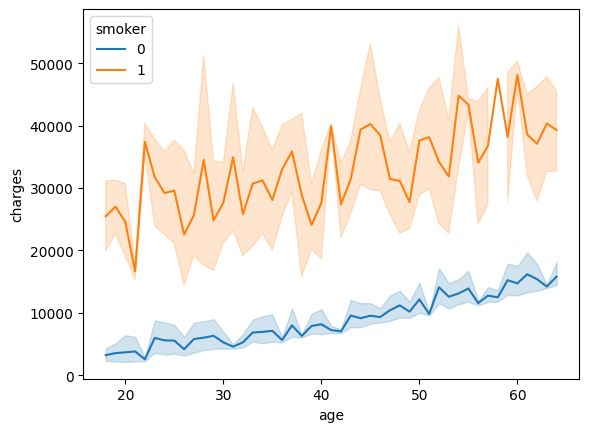

In [81]:
sns.lineplot(x='age', y='charges', data=df, hue='smoker')
plt.show()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 940 to 1241
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 83.6+ KB


In [83]:
# Smoker
x = df.age.loc[df['smoker'] == 1]
y = df.charges.loc[df['smoker'] == 1]

In [84]:
# No smoker
x2 = df.age.loc[df['smoker'] == 0]
y2 = df.charges.loc[df['smoker'] == 0]

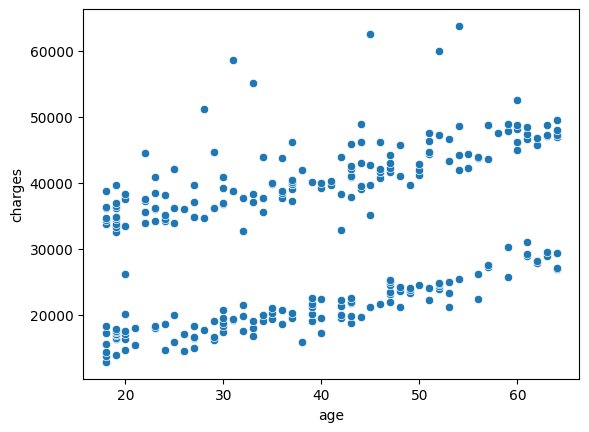

In [85]:
sns.scatterplot(data=df, x=x, y=y)
plt.show()

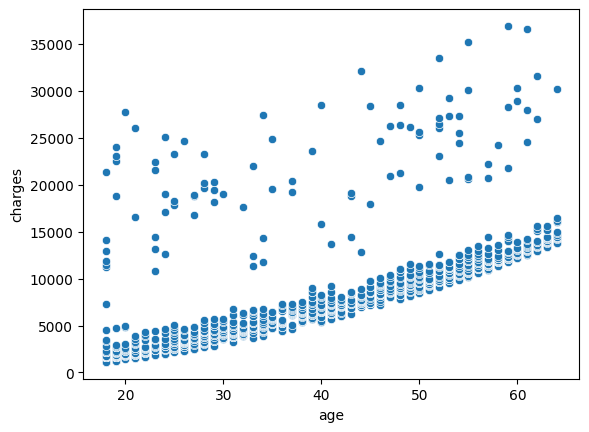

In [86]:
sns.scatterplot(data=df, x=x2, y=y2)
plt.show()

In [87]:
df[['age', 'charges', 'smoker']].corr()

,age,charges,smoker
age,1.000000,0.299008,-0.025019
charges,0.299008,1.000000,0.787251
smoker,-0.025019,0.787251,1.000000


## Training Linear Regresion

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.33, random_state=42)

In [90]:
l_model = LinearRegression(fit_intercept=True)
l_model2 = LinearRegression(fit_intercept=True)

In [91]:
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

X2_train = X2_train.values.reshape(-1, 1)
y2_train = y2_train.values.reshape(-1, 1)

In [98]:
l_model.fit(X_train, y_train)
l_model2.fit(X2_train, y2_train)


LinearRegression()

In [99]:
l_model.coef_, l_model2.coef_

(array([[290.44034514]]), array([[265.8920983]]))

## Model Error

In [94]:
#Error valuation
from sklearn.metrics import mean_squared_error
y_train_pred = l_model.predict(X_train)
y_test_pred = l_model.predict(X_test.values.reshape(-1, 1))
print('Error train:', mean_squared_error(y_train, y_train_pred))
print('Error test:', mean_squared_error(y_test, y_test_pred))

Error train: 111610480.3820738
Error test: 123706633.47492039


In [100]:
y2_train_pred = l_model2.predict(X2_train)
y2_test_pred = l_model2.predict(X2_test.values.reshape(-1, 1))
print('Error train:', mean_squared_error(y2_train, y2_train_pred))
print('Error test:', mean_squared_error(y2_test, y2_test_pred))

Error train: 21112966.04275905
Error test: 23006311.728288684


In [101]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
print('coef: ', r2)

coef:  0.10544101460061917


In [102]:
r2_2 = r2_score(y2_test, y2_test_pred)
print('coef: ', r2_2)

coef:  0.36726891242831494


## Model Viz

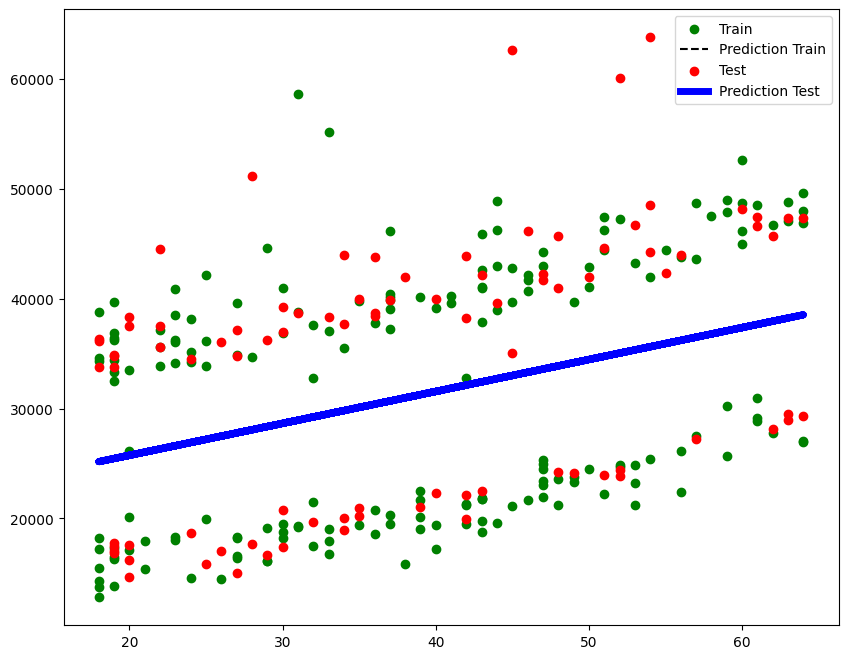

In [103]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train,  color='green', label = 'Train')
plt.plot(X_train, y_train_pred, color='k', linestyle = '--', label = 'Prediction Train')

plt.scatter(X_test.values.reshape(-1,1), y_test.values.reshape(-1,1),  color='red', label = 'Test')
plt.plot(X_test, y_test_pred, color='blue', linewidth=5.0, label = 'Prediction Test')

plt.legend()
plt.show()

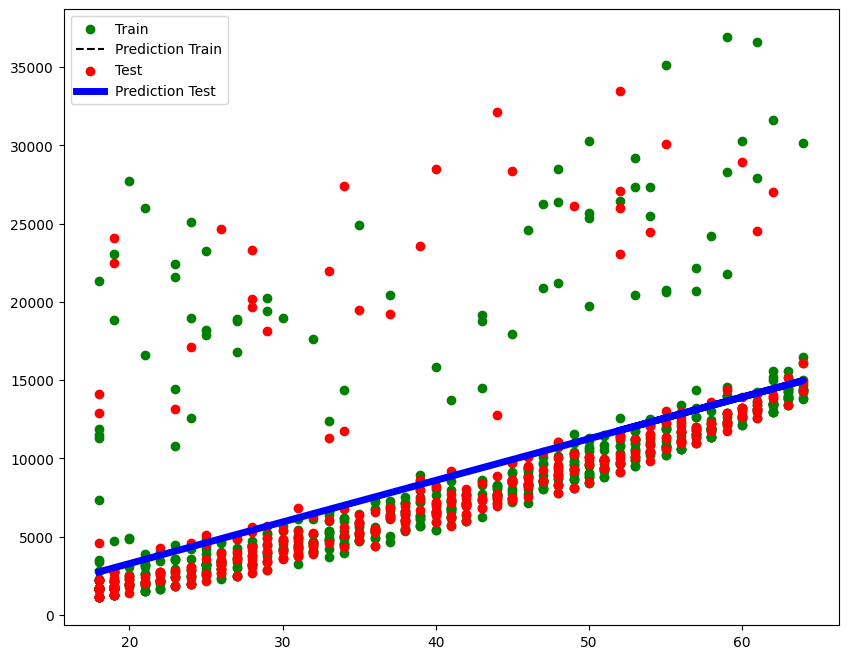

In [104]:
plt.figure(figsize = (10,8))

plt.scatter(X2_train, y2_train,  color='green', label = 'Train')
plt.plot(X2_train, y2_train_pred, color='k', linestyle = '--', label = 'Prediction Train')

plt.scatter(X2_test.values.reshape(-1,1), y2_test.values.reshape(-1,1),  color='red', label = 'Test')
plt.plot(X2_test, y2_test_pred, color='blue', linewidth=5.0, label = 'Prediction Test')

plt.legend()
plt.show()

## Prediction

In [105]:
prediction = l_model.predict([[36]])
print(f'the amount to pay for health insurance if you are a smoker you are 36 y/o is: {round(float(prediction), 2)}')

the amount to pay for health insurance if you are a smoker you are 36 y/o is: 30392.57


In [106]:
prediction2 = l_model2.predict([[36]])
print(f'the amount to pay for health insurance if you are not a smoker you are 36 y/o is: {round(float(prediction2), 2)}')

the amount to pay for health insurance if you are not a smoker you are 36 y/o is: 7530.78
